## make_mockobs_filaments_testing

also tests the extract_filament script

load SBdata of the filaments and add noise with the ,ipynb add_noise script to compare with earlier noise adding script.

The verdict:
- the old noise adding script shouldn't be used at the moment (from the HalphaSBplot_addnoise.py script) because it has (x10) in the area_lens value
- there is a new noise adding script that is a copy of the old noise adding script but without the (x10) in the area_lens value (called add_noise_new)
- both add_noise_new and add_noise (the current noise adding script) give the exact same results so can use either one.


In [2]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import datetime

%matplotlib inline

%run 'add_noise.ipynb'

In [13]:
def plotdata(data,ax=None,bounds=None,colorbar=False,colmap='viridis',colorbarloc='right'):
    if ax is None:
        fig = plt.figure(figsize=(6, 3.2))
        ax = fig.add_subplot(111)
        oneplot=True
    if bounds is None:
        img = ax.imshow(data,origin='lower',cmap=cm.get_cmap(colmap),interpolation='nearest')
    else:
        img = ax.imshow(data,origin='lower',cmap=cm.get_cmap(colmap),vmin=bounds[0],vmax=bounds[1],interpolation='nearest')
    ax.set_aspect('equal')
    
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    ax.patch.set_facecolor('black')
    
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        if colorbarloc=='Top':
            cax = div.append_axes("top",size="10%",pad=0.2)
            cbar = plt.colorbar(img,cax=cax,orientation='horizontal')#,boundaries=np.linspace(0,90000))
        else:
            cax = div.append_axes("right",size="10%",pad=0.15)
            cbar = plt.colorbar(img,cax=cax,orientation='vertical')#,boundaries=np.linspace(0,90000))
        cbar.ax.tick_params()

In [15]:
SBdata = np.load('mockobservations/SBdata_full.npz')['arr_0']

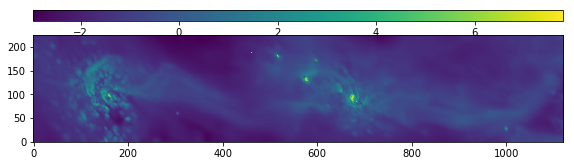

In [16]:
fig = plt.figure(figsize=(9.5,5.))
ax1 = plt.subplot(111)
plotdata(SBdata.T,ax=ax1,colorbar=True,colorbarloc='Top')

In [17]:
SBdata.shape

(1121, 225)

Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 50Mpc is 13.0357429643.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_50Mpc_13arcsec_5slwd.npz exists, loading now...
./intermediatedata/data_50Mpc_13arcsec_5slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,13.0357429643 appended.
The type of size is <type 'float'>


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Region 1: [ 15328.  14944.  15168.  15552.] , [ 3360.  4480.  4480.  3360.]
xacross_length,yacross_length,xdown_length,ydown_length:  224, 0, -384, 1120
xacross_length > yacross_length:
iterable: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 

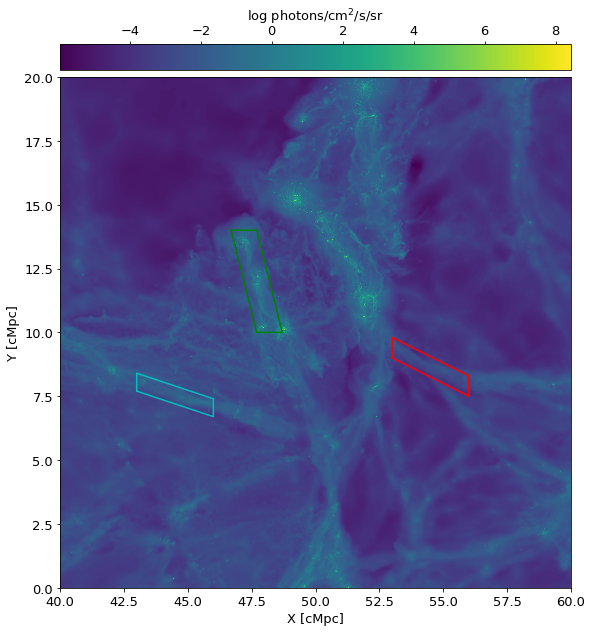

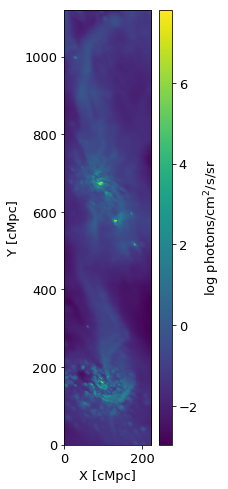

In [18]:
%run 'extract_filament.ipynb'
machine = 'chinook'
plotchecks = True

data_tuple_5 = loaddata(machine=machine,resolution=None,distance='50Mpc',slicewidth=5.)
SBdata_5 = extractfilament(data_tuple=data_tuple_5,plotchecks=True)

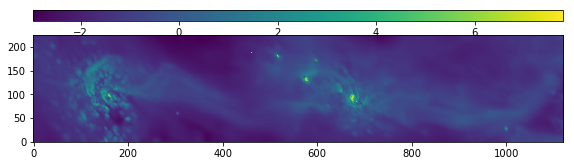

In [19]:
fig = plt.figure(figsize=(9.5,5.))
ax1 = plt.subplot(111)
plotdata(SBdata_5.T,ax=ax1,colorbar=True,colorbarloc='Top')

In [21]:
np.array_equal(SBdata, SBdata_5)

True

## Add noise to the filament

Now that I have confirmed that I can recreate the filament data, let's try adding noise to this stuff.

In [45]:
resolution = data_tuple_5[3]
print resolution
exptime = 60.*60.*1000.
filterwidth = 1
CMOS = True
ROnoise = None
includemeannoise = True

13.0357429643


### New add_noise script, new data

******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 100
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using new CMOS cameras... (QE = 0.70, R = 2.)
DEBUGGING: R is : 2.0
DEBUGGING: the number of pixels per bin is 1296.0
DEBUGGING: raise the data by 10** since was logged data before...
DEBUGGING: the total object signal [electrons] detected ranges from: 4.33740894361 to 252009268949.0
The width of the filter that the data was taken with is 1 nm. 
DEBUGGING: Sky background in filter width of 1 nm is calculated already: 0.560633.
Adding sky background noise and shot noise...
DEBUGGING: the background in the bandwidth is: 0.560633 photon/s/arcsec^2/m^2
DEBUGGING: the background signal, B_sky, is: 2.01611304518 electron/s/pixel
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 9406377023.6
DEBUGGING: the total background noisy signal [electrons] ranges fro

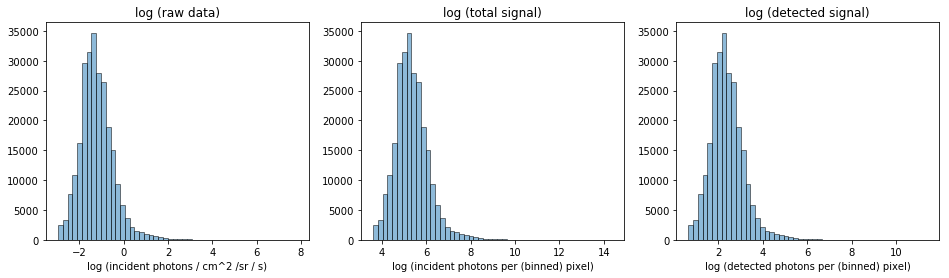

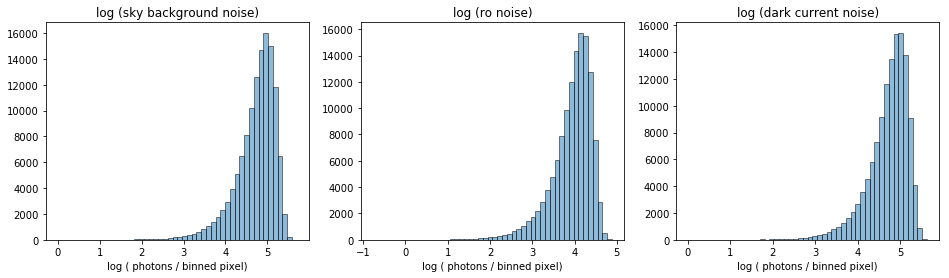

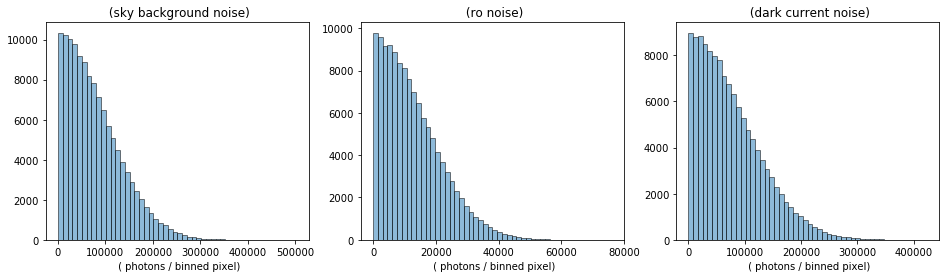

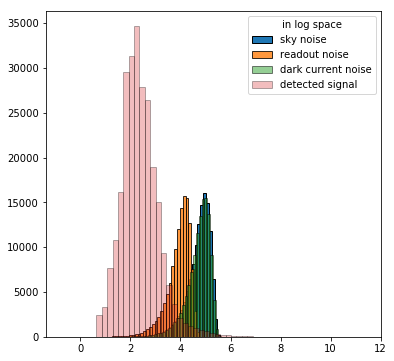

In [119]:
noiseadded_signal,B_sky_array,R_array,D_array = addnoise(SBdata_5,resolution,exptime=exptime,filterwidth=filterwidth,\
                                                         CMOS=CMOS,R=ROnoise,debugging=True,includemeannoise=includemeannoise,\
                                                         plotchecks=plotchecks)

Now let's try binning the data to 100 arcsec resolution -- went and looked at HalphaSB_reduce_resolution to find the factor by which the resolution was binned to get to 100 arcsec resolution so we can compare better to the previous results here.

In [110]:
%run 'mask_galaxies.ipynb'

In [114]:
#factor = int(100./resolution) 
factor = 8

noiseadded_signal_100,mask_none, fillvalue_none = imreduce_masked(noiseadded_signal,factor,log=False,masking=False,method='sum')

SBdata_100binned,mask_none, fillvalue_none = imreduce_masked(SBdata_5,factor,log=True,masking=False)

Will set mask to False since masking is set to False.
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 1121,225 to size 1120,224.
Before reducing resolution, the original array was trimmed from size 1121,225 to size 1120,224.
take the sum along different axes
Will set mask to False since masking is set to False.
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 1121,225 to size 1120,224.
Before reducing resolution, the original array was trimmed from size 1121,225 to size 1120,224.
take the mean along different axes


In [115]:
noiseadded_signal_100.shape

(140, 28)

In [116]:
SBdata_100 = np.load('mockobservations/SBdata_100arcsec.npz')['arr_0']

In [35]:
SBdata_100.shape

(141, 29)

The size of the SBdata_100 is smaller than that produced in this script, most likely because the filament selection was done after binning the data instead of before, as was done in this case. 

In [123]:
def plotfilamentnice(SBdata_exp0,ax,mymap='gist_gray',label=''):
    # Plot the data nicely
    median = np.median(SBdata_exp0);
    sig = np.sqrt(median)

    mymax = median + 40*sig
    mymin = median - 5*sig

    SBdata_clipped = SBdata_exp0 + 0
    SBdata_clipped[SBdata_clipped < mymin] = mymin
    SBdata_clipped[SBdata_clipped > mymax] = mymax
    SBdata_clipped = SBdata_clipped - mymin
    
    get_halpha_SB.makemapfilament(np.log10(SBdata_clipped**0.5),ax,contours=False,mockobs=True,\
                                  colmap=mymap,label=label,labelaxes=True)


In [76]:
import HalphaSBplot_addnoise

def plotit(SBdata,exptime, ax1, mymap='gist_gray', res=500, label=''):
    
    addnoisesqrt = False

    resolution = res
    SBdata_exp0 = HalphaSBplot_addnoise.addnoise(SBdata,resolution,exptime=exptime,CMOS=True)

    # Plot the subtracted noiseadded data
    #fig = plt.figure(figsize = (9.5, 5.))
    #ax1 = plt.subplot(111)

    plotfilamentnice(SBdata_exp0,ax1,mymap=mymap,label=label)
    
    return SBdata_exp0


### Old noise adding script, compare using it on old and new data

In [125]:
# old data
info(SBdata_100)
# new data (binned from full res)
info(SBdata_100binned)

max: 6.08392381668
min: -2.99699950218
max: 6.09459662545
min: -2.94881650718


VERBOSE: Using new CMOS cameras...
DEBUGGING: R_squared is : 4.0
DEBUGGING: the number of pixels is 1276.0
DEBUGGING: the total object signal [electrons] detected ranges from: 39.0965839566 to 47104471085.6
DEBUGGING: an example of the object signal [electrons] is: [  229.23895875   256.7499807    288.90220984   325.19056412   347.6727419
   334.24639523   347.49928885   434.57015813   522.52064512   543.40506225
   562.65975804   638.7806908    767.04082643   972.98720848  1164.20344198
  1156.32966583  1269.14470037  1361.04783489  1473.82969203  1700.21966577
  1577.4384963   1505.90633097  2835.77683337  3566.13565442  2096.13574421
  2145.13407598  1619.20114406  1235.08922943  1067.4496977 ]
DEBUGGING: the background in the bandwidth is: 0.560633
DEBUGGING: the background signal, B_sky [ph/s (in a pixel)], is: 20.1611304518
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 92612168843.5
DEBUGGING: the total background noisy signal [electrons] ranges from: 

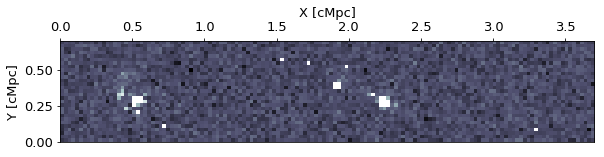

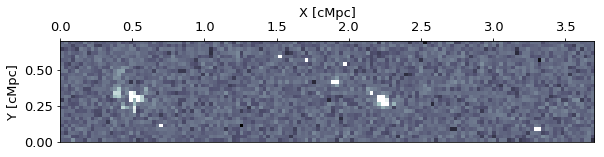

In [124]:
fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))

map = 'bone'; label = '100" resolution'; exptime = 10**3 * 3600; resolution=100
noiseadded_old_oldscript = plotit(SBdata_100,exptime,ax1, mymap=map, res=100)

fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))

map = 'bone'; label = '100" resolution'; exptime = 10**3 * 3600
noiseadded_new_oldscript = plotit(SBdata_100binned,exptime,ax1, mymap=map, res=100)

The two noise-added SB 100 arcsec resolution arrays look the same, so that is good - confirms that the binning is working properly.

### New noise adding script, compare using it on old and new data

Add noise with current noise-adding scripts to the arrays above.

In [80]:
resolution = 100
exptime = 10**3 * 3600
filterwidth = 1
CMOS = True
ROnoise = None
includemeannoise = True

******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 100
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using new CMOS cameras... (QE = 0.70, R = 2.)
DEBUGGING: R is : 2.0
DEBUGGING: the number of pixels per bin is 1296.0
DEBUGGING: raise the data by 10** since was logged data before...
DEBUGGING: the total object signal [electrons] detected ranges from: 4.43686418545 to 4903309054.38
The width of the filter that the data was taken with is 1 nm. 
DEBUGGING: Sky background in filter width of 1 nm is calculated already: 0.560633.
Adding sky background noise and shot noise...
DEBUGGING: the background in the bandwidth is: 0.560633 photon/s/arcsec^2/m^2
DEBUGGING: the background signal, B_sky, is: 2.01611304518 electron/s/pixel
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 9406377023.6
DEBUGGING: the total background noisy signal [electrons] ranges from

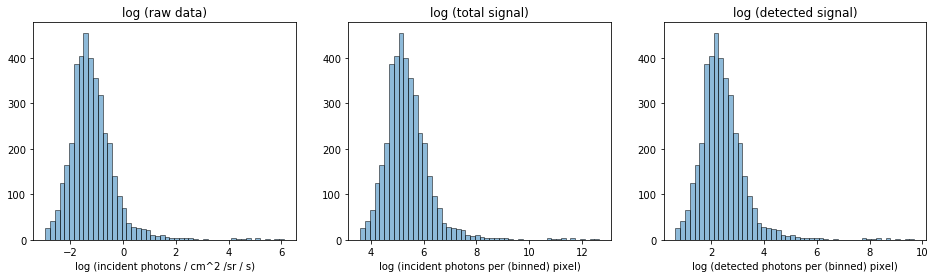

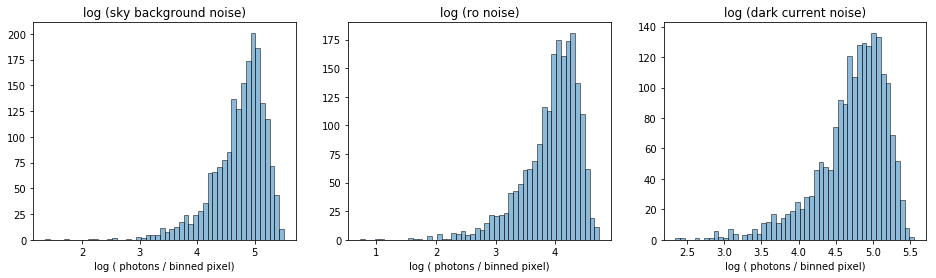

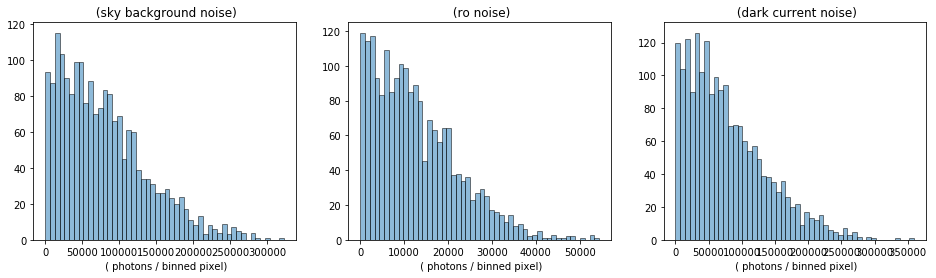

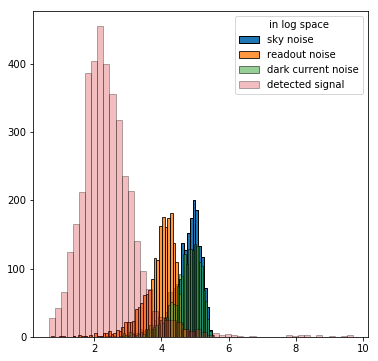

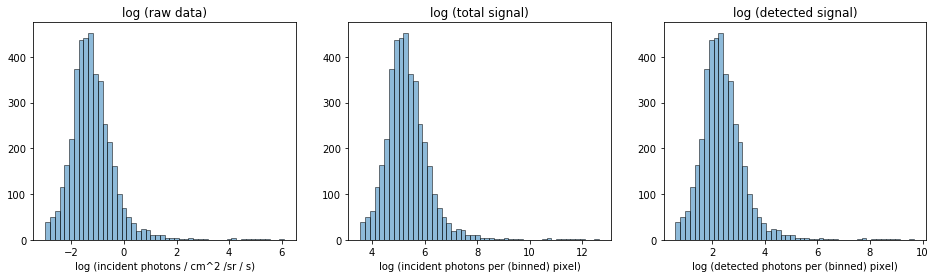

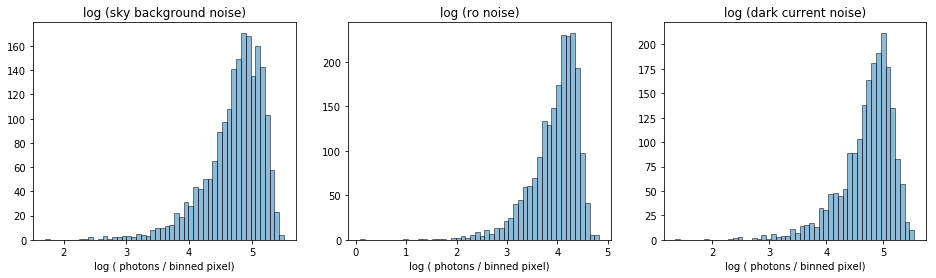

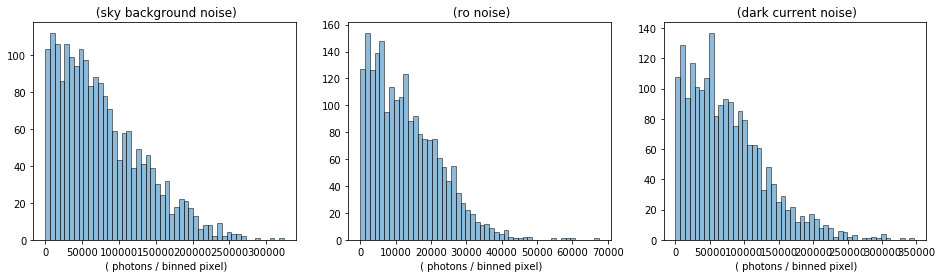

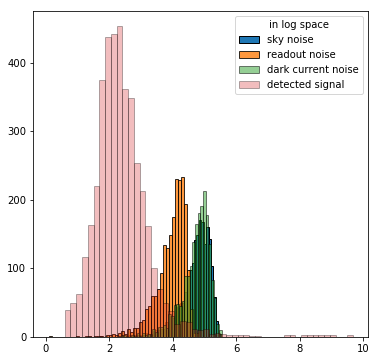

In [127]:
noiseadded_100_new,B_sky_array,R_array,D_array = addnoise(SBdata_100binned,resolution,exptime=exptime,filterwidth=filterwidth,\
                                                         CMOS=CMOS,R=ROnoise,debugging=True,includemeannoise=includemeannoise,\
                                                         plotchecks=plotchecks)

noiseadded_100_old,B_sky_array,R_array,D_array = addnoise(SBdata_100,resolution,exptime=exptime,filterwidth=filterwidth,\
                                                         CMOS=CMOS,R=ROnoise,debugging=True,includemeannoise=includemeannoise,\
                                                         plotchecks=plotchecks)

VERBOSE: Using new CMOS cameras...
DEBUGGING: R_squared is : 4.0
DEBUGGING: the number of pixels is 1276.0
DEBUGGING: the total object signal [electrons] detected ranges from: 4.36839405913 to 4827640704.78
DEBUGGING: an example of the object signal [electrons] is: [  28.8268137    30.94770445   33.49380432   37.0762687    39.76331867
   38.17789384   40.86054441   50.80393702   58.85380334   58.81403722
   60.51736459   67.18805832   86.66262235  119.85677739  144.04272991
  144.9409521   168.0202562   174.05132669  160.19040623  182.70703177
  169.09308162  186.0775985   607.80686422  422.76936296  247.95312535
  317.32259368  164.85700266  126.36019107]
DEBUGGING: the background in the bandwidth is: 0.560633
DEBUGGING: the background signal, B_sky [ph/s (in a pixel)], is: 2.01611304518
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 9261216884.35
DEBUGGING: the total background noisy signal [electrons] ranges from: -318964.482484 to 349596.978993
DEBUGGING:

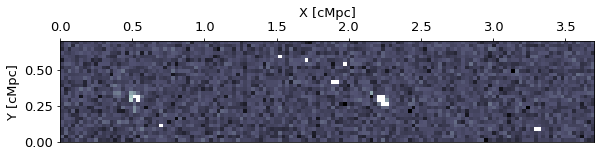

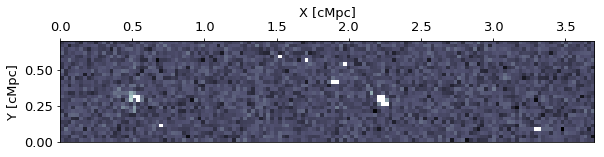

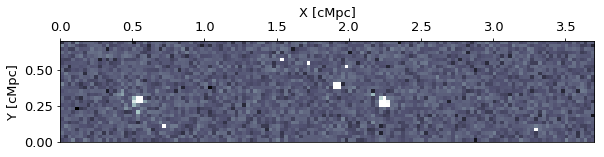

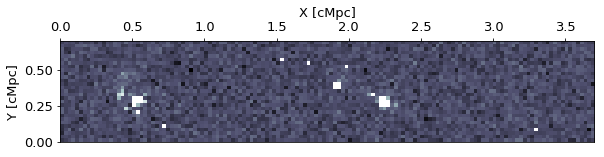

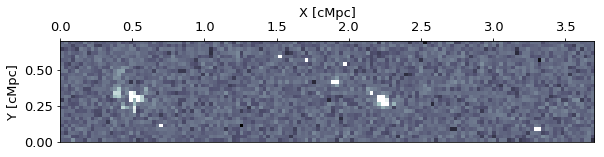

In [133]:
### add_noise_new                  OLD NOISE ADDING SCRIPT, SLIGHTLY CHANGED
fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))
map = 'bone'; label = '100" resolution'; exptime = 10**3 * 3600; resolution=100
noiseadded_testing = addnoisenew(SBdata_100binned,resolution,R_squared=None,\
                                 exptime=10**3*3600.,CMOS=True, debugging=True);
plotfilamentnice(noiseadded_testing,ax1,mymap=map,label='')

### add_noise                      CURRENT NOISE ADDING SCRIPT
fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))
map = 'bone'; label = '100" resolution'; 
plotfilamentnice(noiseadded_100_new,ax1,mymap=map,label='')

fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))
map = 'bone'; label = '100" resolution'; 
plotfilamentnice(noiseadded_100_old,ax1,mymap=map,label='')

### HalphaSBplot_addnoise.addnoise OLD NOISE ADDING SCRIPT
fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))
map = 'bone'; label = '100" resolution'; 
plotfilamentnice(noiseadded_old_oldscript,ax1,mymap=map,label='')

fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))
map = 'bone'; label = '100" resolution'; 
plotfilamentnice(noiseadded_new_oldscript,ax1,mymap=map,label='')

## The reason for the big difference between the old and current noise adding scripts:
The old noise adding script had the area of the lens = 10* 48 lenses

The new noise adding script is the old noise adding script but with the *10 taken out.

In [84]:
info(noiseadded_100_new)
info(noiseadded_100_old)

max: 23516557905.6
min: 18612715998.9
max: 23397628902.1
min: 18612698434.8


In [89]:
info(noiseadded_old_oldscript)
info(noiseadded_new_oldscript)

max: 148536802643.0
min: 101430668226.0
max: 149708445584.0
min: 101430781085.0


## new add_noise_new script to go through the different steps and compare the noise adding script
The main change is removing the "x10" in the area_lens value.

### comparing adding the noise before and after binning
I think the main difference here may be due to different number of pixels being binned or due to the image plotting making it look slight different... Not 100% sure though.

Need to go through and check to make sure that the noises are being correctly added together.

In [95]:
%run 'add_noise_new.ipynb'

VERBOSE: Using new CMOS cameras...
DEBUGGING: R_squared is : 4.0
DEBUGGING: the number of pixels is 1276.0
DEBUGGING: the total object signal [electrons] detected ranges from: 4.36839405913 to 4827640704.78
DEBUGGING: an example of the object signal [electrons] is: [  28.8268137    30.94770445   33.49380432   37.0762687    39.76331867
   38.17789384   40.86054441   50.80393702   58.85380334   58.81403722
   60.51736459   67.18805832   86.66262235  119.85677739  144.04272991
  144.9409521   168.0202562   174.05132669  160.19040623  182.70703177
  169.09308162  186.0775985   607.80686422  422.76936296  247.95312535
  317.32259368  164.85700266  126.36019107]
DEBUGGING: the background in the bandwidth is: 0.560633
DEBUGGING: the background signal, B_sky [ph/s (in a pixel)], is: 2.01611304518
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 9261216884.35
DEBUGGING: the total background noisy signal [electrons] ranges from: -324204.989896 to 331932.804103
DEBUGGING:

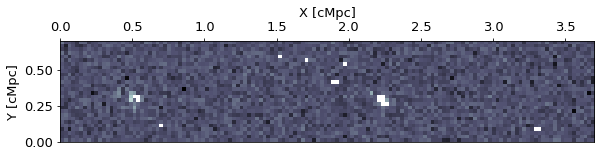

In [129]:
## ADD NOISE AFTER BINNING

fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))

map = 'bone'; label = '100" resolution'; exptime = 10**3 * 3600; resolution=100
noiseadded_testing = addnoisenew(SBdata_100binned,resolution,R_squared=None,\
                                 exptime=10**3*3600.,CMOS=True, debugging=True)
plotfilamentnice(noiseadded_testing,ax1,mymap=map,label='')

In [99]:
info(noiseadded_testing)
info(noiseadded_100_old)

max: 22908495227.2
min: 18080366683.2
max: 23397628902.1
min: 18612698434.8


VERBOSE: Using new CMOS cameras...
DEBUGGING: R_squared is : 4.0
DEBUGGING: the number of pixels is 22.0
DEBUGGING: the total object signal [electrons] detected ranges from: 0.0736288555242 to 4277935121.04
DEBUGGING: an example of the object signal [electrons] is: [  0.42232089   0.42887024   0.43496372   0.44067952   0.44627488
   0.45204178   0.45805969   0.46410447   0.46989716   0.47514772
   0.47977772   0.48415373   0.48873758   0.49380624   0.499404
   0.50546798   0.51193599   0.51875354   0.5259387    0.53355925
   0.54171115   0.55042466   0.55953262   0.56867264   0.57757659
   0.58621303   0.59475099   0.6032669    0.61171162   0.6201513
   0.62849968   0.63658989   0.64414139   0.65066383   0.6553575
   0.65756593   0.65731221   0.65490362   0.65066168   0.64516664
   0.63890867   0.63203617   0.62482619   0.61800678   0.61238026
   0.60856742   0.60692591   0.60756197   0.61030148   0.61496085
   0.62161014   0.63049748   0.64187726   0.65593016   0.6727319
   0.6923132 

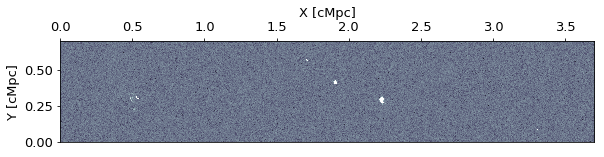

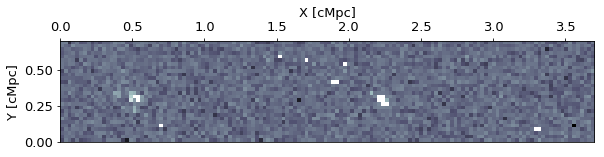

In [132]:
### ADD NOISE BEFORE BINNING

fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))
map = 'bone'; label = '100" resolution'; exptime = 10**3 * 3600; resolution=13
noiseadded_unbinned = addnoisenew(SBdata_5,resolution,R_squared=None,\
                                 exptime=10**3*3600.,CMOS=True, debugging=True)
plotfilamentnice(noiseadded_unbinned,ax1,mymap=map,label='')

factor=8
noiseadded_binned,mask_none, fillvalue_none = imreduce_masked(noiseadded_unbinned,factor,\
                                                              log=False,masking=False,\
                                                              method='sum')

print noiseadded_binned.shape
print ""

fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))
map = 'bone'; 
plotfilamentnice(noiseadded_binned,ax1,mymap=map,label='')


In [112]:
info(noiseadded_unbinned)
info(noiseadded_binned)

max: 4589627156.33
min: 311660880.367
max: 25278574534.4
min: 19951122988.5


In [109]:
np.sum(noiseadded_unbinned[0:8,0:8])

19951396629.910297

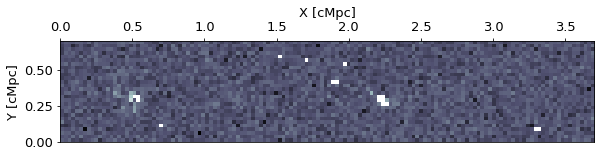

In [131]:
fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))

map = 'bone'; label = '100" resolution'; 

plotfilamentnice(noiseadded_signal_100,ax1,mymap=map,label='')

In [118]:
info(noiseadded_signal_100)

max: 29032823960.9
min: 22978669408.5


In [92]:
def info(array):

    print 'max: %s'%np.max(array)
    print 'min: %s'%np.min(array)

info(noiseadded_signal_100)
print ""
info(SBdata_exp0)

max: 1074864110.94
min: 980267569.087

max: 149708230124.0
min: 101430676069.0
